### Entregable para el 19 de enero.

#### Asunto, predecir el precio del coche. db=bmw_pricing_v2

In [1]:
# Cargamos librerías
import pandas as pd 
import numpy as np
from pickle import TRUE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

from jupyterthemes import jtplot
jtplot.style("monokai")


In [2]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:

# df_pricing = pd.read_csv('/bmw_pricing_v2.csv')
path = !pwd
file = 'bmw_pricing_v2.csv'
df_pricing = pd.read_csv(f'{path[0]}/{file}',sep=",")
df_pricing.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


#### Estructura de datos

In [4]:
print("-------------------------------------------------");
print("shape ",df_pricing.shape);
print("-------------------------------------------------");
print(df_pricing.info());
print("-------------------------------------------------");
print(df_pricing.describe());

-------------------------------------------------
shape  (4843, 18)
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_trasero

##### Ver si hay líneas duplicadas

In [5]:
# vemos la cantidad de duplicados
print("Líneas duplicadas ",df_pricing.duplicated().sum());
print("Vemos longitud de duplicados",len(df_pricing[df_pricing.duplicated()]))
# por columnas
#df_pricing[df_pricing.duplicated(['columnA','columnB'],keep=False)]
print("\nVemos un ejemplo de busqueda de duplicados por columnas concretas");
print("En este caso, modelo, km, potencia y precio");
df_pricing[df_pricing.duplicated(['modelo','km','potencia','precio'],keep=False)]

Líneas duplicadas  0
Vemos longitud de duplicados 0

Vemos un ejemplo de busqueda de duplicados por columnas concretas
En este caso, modelo, km, potencia y precio


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2219,BMW,116,116708.0,85.0,2013-08-01,diesel,black,hatchback,False,True,False,False,False,False,True,False,9000.0,2018-05-01
3644,BMW,116,116708.0,85.0,2012-11-01,diesel,black,subcompact,False,True,False,False,True,False,True,False,9000.0,2018-02-01


In [6]:
# En caso de haber eliminados duplicados
# df_pricing.drop_duplicates(inplace=True)

In [7]:
#vemos gráficos y coef de correlacion (Pearson's r) con lo que actualmente tenemos con datos numéricos para tener un pantallazo


In [8]:
corr_matrix=df_pricing.corr()

/var/folders/cb/qsc54clj5ln45bl99qwqssfh0000gn/T/ipykernel_45789/1484066.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df_pricing.corr()


In [9]:
corr_matrix['precio'].sort_values(ascending=False)

precio      1.000000
potencia    0.639254
gps        -0.005227
km         -0.410189
Name: precio, dtype: float64

In [10]:
#potencia y km estan correlacionados con el target, siendo potenciales predictores del valor de los vehículos

In [11]:
#otra forma de cver correlaciones es usar el scatter_matrix() que grafica cada var numérica contra otra var numérica

In [12]:
from pandas.plotting import scatter_matrix

In [13]:
#scatter_matrix hace scatter plot para vinculo entre variables, y en la diagonal un histograma de cada una

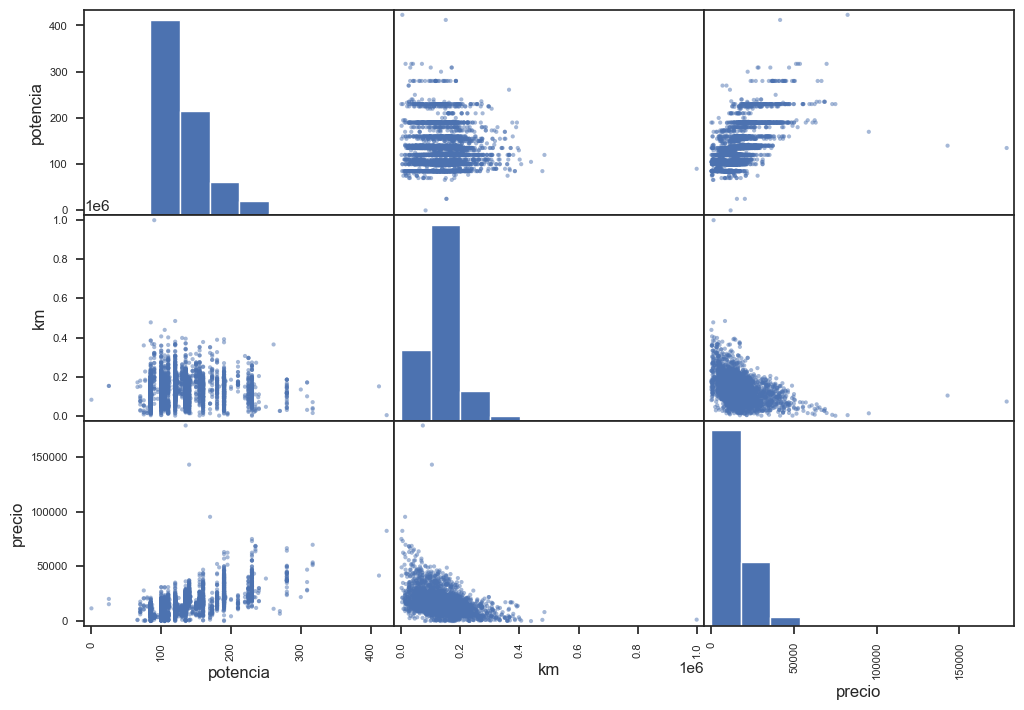

In [14]:
atributos=['potencia','km','precio']
sns.set_theme(style="ticks")
scatter_matrix(df_pricing[atributos], figsize=(12,8))
plt.show()

#####  Vemos los valores nulos

In [15]:
# Listado de campos con su número de nulos
df_pricing.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [16]:
#% de cada variable en NA
NA = pd.DataFrame(data=[df_pricing.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
          for i in (df_pricing.isna().sum()/df_pricing.shape[0]*100).tolist()]],
           columns=df_pricing.columns, index=['Cant NA', '% NA']).transpose()

NA.style.background_gradient(cmap="Pastel1_r", subset=['Cant NA'])

,Cant NA,% NA
marca,2,0.04%
modelo,3,0.06%
km,2,0.04%
potencia,1,0.02%
fecha_registro,1,0.02%
tipo_gasolina,5,0.10%
color,12,0.25%
tipo_coche,9,0.19%
volante_regulable,4,0.08%
aire_acondicionado,2,0.04%


In [17]:
#hacemos copia porq vamos a modificar la var fecha
df_pricing_01=df_pricing.copy()

In [18]:
#borramos la variable marca porque tiene un solo valor, asi no afecta las listas de los tipos
df_pricing_01.drop('marca',axis=1,inplace=True)

In [19]:
#previo an iniciar con el cleaning corregimos la variable fecha
# Pasamos la fechas de Objetos/texto a datatime
lista_fechas = ["fecha_registro","fecha_venta"]
for i in lista_fechas:
    df_pricing_01[i] = pd.to_datetime(df_pricing_01[i])

In [20]:
# Ahora haremos el split de campos de fecha
for col in lista_fechas:
    df_pricing_01[col + '_DIA'] = df_pricing_01[col].dt.day
    df_pricing_01[col + '_MES'] = df_pricing_01[col].dt.month
    df_pricing_01[col + '_ANIO'] = df_pricing_01[col].dt.year
    # boorramos la columna que está corriendo actualmente
    del df_pricing_01[col] # como aca la borramos, abajo cuando separemos no va a aparecer

In [21]:
df_pricing_01.drop('fecha_registro_DIA',axis=1,inplace=True)           

In [22]:
df_pricing_01.drop('fecha_venta_DIA',axis=1,inplace=True)           

In [23]:
df_pricing_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   tipo_gasolina                4838 non-null   object 
 4   color                        4831 non-null   object 
 5   tipo_coche                   4834 non-null   object 
 6   volante_regulable            4839 non-null   object 
 7   aire_acondicionado           4841 non-null   object 
 8   camara_trasera               4841 non-null   object 
 9   asientos_traseros_plegables  4839 non-null   object 
 10  elevalunas_electrico         4841 non-null   object 
 11  bluetooth                    4839 non-null   object 
 12  gps                          4843 non-null   bool   
 13  alerta_lim_velocid

In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
#vamos a seprar las variables segun su tipo, asi analizamos los nulos en forma conjunta por cada tipo de variable con Srncikit

In [26]:
target=['precio']

In [27]:
def obtener_lista_variables(dataset):
    lista_numerica=[]
    lista_boolean=[]
    lista_categorica=[]
    lista_fechas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numerica.append(i)
        elif  (dataset[i].dtype.kind=="O" or dataset[i].dtype.kind=="b") and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categorica.append(i)
            
    return lista_numerica, lista_boolean, lista_categorica

In [28]:

lista_num,lista_boolean,lista_categorica = obtener_lista_variables(df_pricing_01)
lista_num

['km',
 'potencia',
 'fecha_registro_MES',
 'fecha_registro_ANIO',
 'fecha_venta_MES',
 'fecha_venta_ANIO']

In [29]:
lista_boolean

['gps']

In [30]:
lista_categorica # toma los q tiene TRUE FALSE, pq tambien tiene valores NA ( al sacar los na, volvemos a correr la fx)

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [31]:
#NULOS
#copia para sacar nulos
df_pricing_02=df_pricing_01.copy()

In [32]:
#nulos en variables numéricas
df_pricing_02[lista_num].isnull().sum()

km                     2
potencia               1
fecha_registro_MES     1
fecha_registro_ANIO    1
fecha_venta_MES        1
fecha_venta_ANIO       1
dtype: int64

In [33]:
#vamos a aplicar IterativeImuputer que entrena un modelo de regresion por cada variable numérica para predecir los na, en funcion de las otras variables.
#luego entrena el modelo en la data actualizada y repite el proceso varias veces, mejorando el modelo y los valores de reemplazos en cada iteracion.

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [35]:
imputer=IterativeImputer()

In [36]:
df_pricing_02[lista_num]=imputer.fit_transform(df_pricing_02[lista_num])

In [37]:
df_pricing_02[lista_num].isnull().sum()

km                     0
potencia               0
fecha_registro_MES     0
fecha_registro_ANIO    0
fecha_venta_MES        0
fecha_venta_ANIO       0
dtype: int64

In [38]:
df_pricing_02[df_pricing_02['precio'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_MES,fecha_registro_ANIO,fecha_venta_MES,fecha_venta_ANIO
117,420,174740.0,135.0,diesel,white,coupe,True,True,True,False,True,True,True,True,NaN,11.0,2013.0,5.0,2018.0
524,520,163803.0,135.0,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,7.0,2013.0,2.0,2018.0
539,316,34489.0,85.0,diesel,black,estate,True,False,False,False,False,False,True,False,NaN,7.0,2013.0,2.0,2018.0
549,318,157129.0,100.0,diesel,blue,estate,True,True,True,False,True,False,True,True,NaN,9.0,2013.0,3.0,2018.0
569,320,166866.0,120.0,diesel,blue,estate,True,True,False,False,True,True,True,True,NaN,5.0,2014.0,3.0,2018.0
584,320,114771.0,135.0,diesel,blue,estate,False,True,False,False,False,False,True,False,NaN,5.0,2014.0,3.0,2018.0


In [39]:
#borramos las observaciones con P null
df_pricing_02.dropna(subset=['precio'],inplace=True)

In [40]:
df_pricing_02['precio'].isnull().sum()

0

In [41]:
#para variables categóricas usamos Srncikit-Lea class:SimpleImputer. El beneficio es que almacena, por ej, la media de cada variable --> se podrá imputar el missing value no solo
# al training set ( esto no lo  vimos pero deberiamos seprar inicialmente un training set de un test set y el test set no se toca hasta el final), sino tambien
#al test set

In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

In [43]:
lista_categorica

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [44]:
#primero se crea un 'imputer' - Aplicamos la moda
#La función sklearn.impute.SimpleImputer permite sustituir valores nulos por otros valores según varias estrategias disponibles.
#La estrategia a ejecutar se indica mediante el parámetro strategy.
#Una vez instanciado el imputer, puede entrenarse con el método fit (que genera un array conteniendo los valores por los que sustituir los valores 
#nulos de cada característica) y puede ejecutarse la sustitución con el método transform.
#imputer=SimpleImputer(strategy='most_frequent')

In [45]:

imputer.fit(df_pricing_02[lista_categorica])

SimpleImputer(strategy='most_frequent')

In [46]:
#el imputer simplemente computa la media de cada atributo  y almacena el rdo en la variable, 'statistics_'. Como no sabemos si en nueva data habrá NA,
#conviene aplicar a todas las variables numéricas

In [47]:
imputer.statistics_

array(['320', 'diesel', 'black', 'estate', True, True, False, False,
       False, False, True], dtype=object)

In [48]:
#esto es igual a el cálculo de la media de las variables dentro de lista_num :)
df_pricing_02[lista_categorica].mode().values

array([['320', 'diesel', 'black', 'estate', True, True, False, False,
        False, False, True]], dtype=object)

In [49]:
#ejecutamos la sustitucion con 'transform'
df_pricing_02[lista_categorica]=imputer.transform(df_pricing_02[lista_categorica])

In [50]:
#IMPORTANTE:el resultado del imputador es un array NumPy, no un dataframe.

In [51]:
df_pricing_02[lista_categorica].isnull().sum()

modelo                         0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
alerta_lim_velocidad           0
dtype: int64

In [52]:
df_pricing_02.isnull().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_registro_MES             0
fecha_registro_ANIO            0
fecha_venta_MES                0
fecha_venta_ANIO               0
dtype: int64

In [53]:
#vuelvo a aplicar fx para tener las lista finales
lista_num,lista_boolean,lista_categorica = obtener_lista_variables(df_pricing_02)

In [54]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [55]:
# Normalizamos Diesel/diesel
df_pricing_02['tipo_gasolina'] = np.where(df_pricing_02['tipo_gasolina'] == 'Diesel', 'diesel', df_pricing_02['tipo_gasolina'])

In [56]:
#vamos a analizar outliers
df_pricing_03=df_pricing_02.copy()

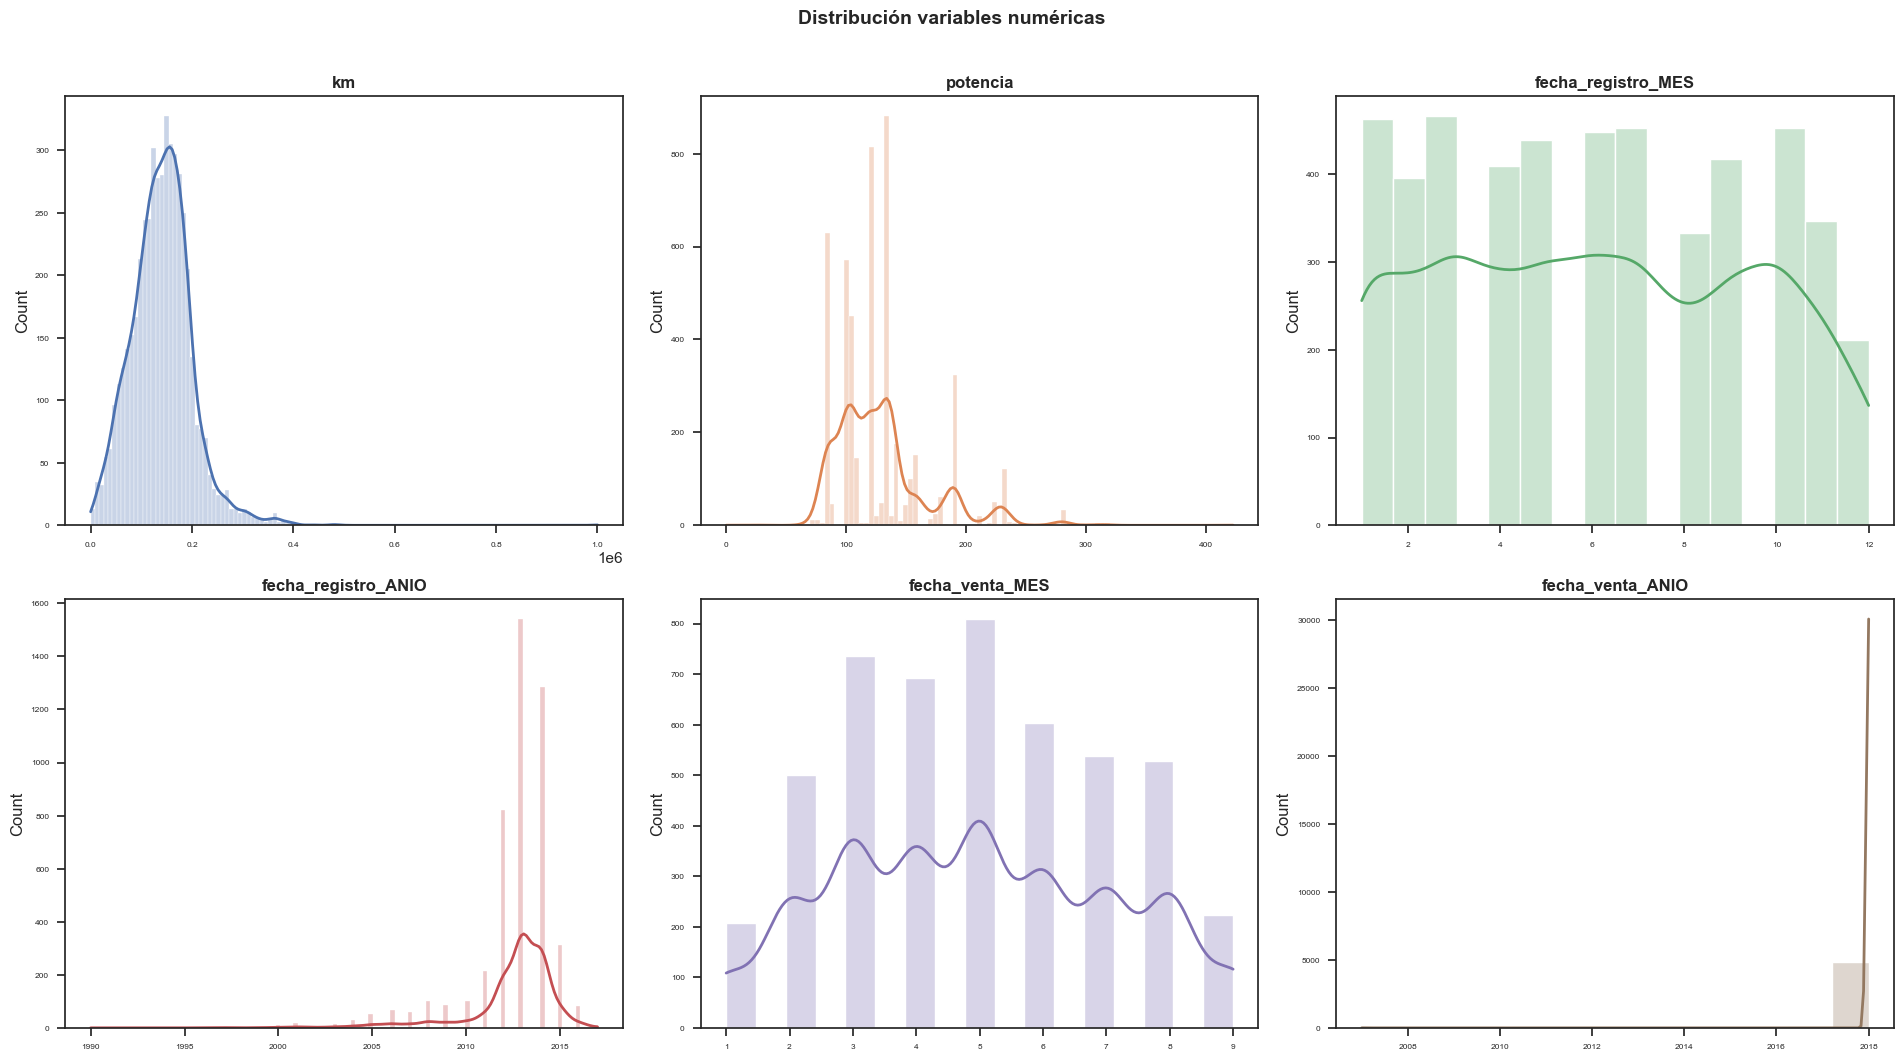

In [57]:
#vemos gráficos de las variables numéricas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(19.2, 10.8))
axes = axes.flat
for i, colum in enumerate(lista_num):
    sns.histplot(
        data    = df_pricing_03,
        x       = colum,
        stat    = "count",
        kde     =True, #función de densidad de probabilidad 
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 14, fontweight = "bold");

In [58]:
#KM 
df_pricing_03['km'].describe()

count    4.837000e+03
mean     1.409640e+05
std      6.020867e+04
min     -6.400000e+01
25%      1.028840e+05
50%      1.410680e+05
75%      1.752350e+05
max      1.000376e+06
Name: km, dtype: float64

In [59]:
# vemos si hay km por debajo 0 o a 0.
df_pricing_03[df_pricing_03['km']<=0]


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_MES,fecha_registro_ANIO,fecha_venta_MES,fecha_venta_ANIO
2938,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,3.0,2017.0,4.0,2018.0


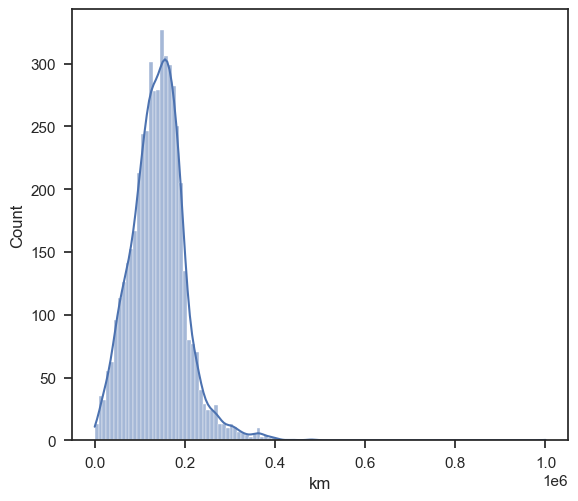

In [60]:
sns.histplot(data=df_pricing, x="km",kde=True); #comparamos

In [61]:
#borramos km<0
outlier_incongruente = df_pricing_03[df_pricing_03['km']<=0].index
df_pricing_03.drop(outlier_incongruente, inplace=True)

In [62]:
#vemos cuántos hay>a 400 mil
df_pricing_03[df_pricing_03['km']>400000].value_counts().sum()

6

In [63]:
outlier_incongruente_kmDeMas = df_pricing_03[df_pricing_03['km']>400000].index


In [64]:
df_pricing_03.drop(outlier_incongruente_kmDeMas, inplace=True)

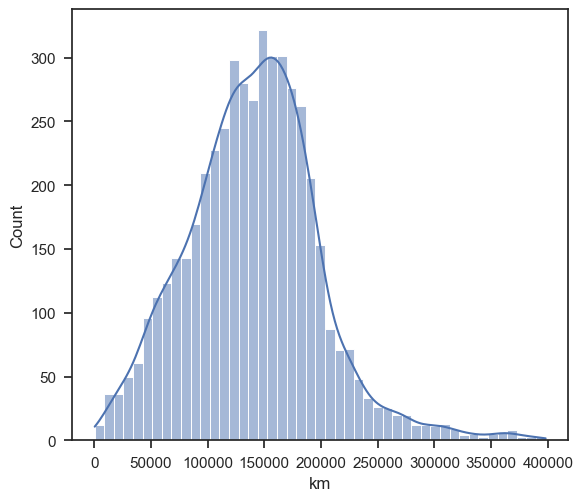

In [65]:
sns.histplot(data=df_pricing_03, x="km",kde=True);

In [66]:
df_pricing.shape[0]

4843

In [67]:
df_pricing_03.shape[0]

4830

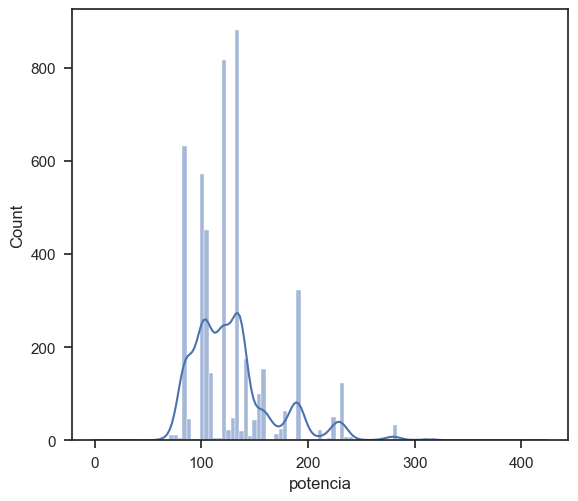

In [68]:
#potencia
sns.histplot(data=df_pricing, x="potencia",kde=True);


In [69]:
# vemos si hay valores de potencia por debajo de 60 (mínimo requerido para coche urbano)
df_pricing_03[df_pricing_03['potencia']<60]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_MES,fecha_registro_ANIO,fecha_venta_MES,fecha_venta_ANIO
1796,i3,152328.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,2.0,2014.0,4.0,2018.0
1925,i3,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,2.0,2014.0,3.0,2018.0
3765,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,10.0,2014.0,3.0,2018.0


In [70]:
outlier_potencia_menor = df_pricing_03[df_pricing_03['potencia']<60].index


In [71]:
df_pricing_03.drop(outlier_potencia_menor, inplace=True)

In [72]:
outlier_potencia_mayor = df_pricing_03[df_pricing_03['potencia']>300].index

In [73]:
df_pricing_03[df_pricing_03['potencia']>300]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_MES,fecha_registro_ANIO,fecha_venta_MES,fecha_venta_ANIO
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,4.0,2016.0,2.0,2018.0
67,M3,29925.0,309.0,petrol,silver,coupe,True,True,False,False,True,True,True,True,47000.0,9.0,2012.0,4.0,2018.0
72,M4,69410.0,317.0,petrol,white,coupe,True,True,False,False,False,True,True,True,53600.0,2.0,2015.0,3.0,2018.0
73,M3,170550.0,309.0,petrol,grey,coupe,True,True,False,False,True,False,True,True,28000.0,3.0,2011.0,3.0,2018.0
93,M3,99283.0,309.0,petrol,silver,coupe,False,False,False,False,True,False,True,True,28600.0,9.0,2008.0,4.0,2018.0
139,M3,169970.0,309.0,petrol,grey,coupe,True,True,False,False,True,False,True,True,35700.0,3.0,2011.0,8.0,2018.0
2944,M3,33670.0,317.0,petrol,blue,sedan,True,True,False,False,False,True,True,True,51200.0,3.0,2014.0,4.0,2018.0
3092,M3,39250.0,317.0,petrol,black,sedan,True,True,False,False,False,True,True,True,52400.0,11.0,2015.0,5.0,2018.0
3601,M5,150187.0,412.0,petrol,white,sedan,True,True,True,False,True,True,True,True,41600.0,2.0,2012.0,9.0,2018.0
4146,X6 M,2970.0,423.0,petrol,red,suv,True,True,True,False,False,False,True,True,82400.0,4.0,2016.0,4.0,2018.0


In [74]:
df_pricing_03.drop(outlier_potencia_mayor, inplace=True)

In [75]:
df_pricing_03['potencia'].describe()

count    4817.000000
mean      128.653214
std        37.759028
min        66.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       300.000000
Name: potencia, dtype: float64

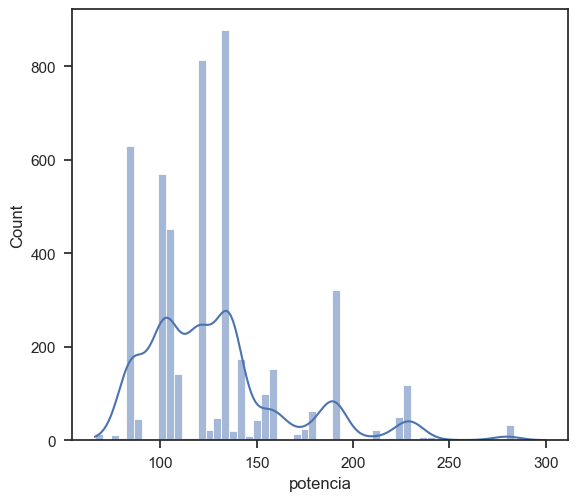

In [76]:
sns.histplot(data=df_pricing_03, x="potencia",kde=True);


In [77]:
df_pricing_03.shape[0]

4817

In [78]:
#fecha registro año

In [79]:
#evaluamos incongruencia
df_pricing_03[ (df_pricing_03['fecha_venta_ANIO']) < (df_pricing_03['fecha_registro_ANIO']) ]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_MES,fecha_registro_ANIO,fecha_venta_MES,fecha_venta_ANIO
42,330,142483.0,180.0,diesel,blue,convertible,True,True,False,False,True,False,True,True,15800.0,1.0,2012.0,8.0,2007.0
100,320,342768.0,135.0,diesel,black,coupe,False,True,False,False,True,False,True,False,8200.0,12.0,2011.0,4.0,2010.0
180,320,181052.0,120.0,diesel,black,estate,False,True,False,False,False,False,True,True,11500.0,10.0,2014.0,4.0,2009.0
256,316,201102.0,85.0,diesel,black,estate,True,False,False,False,False,False,True,False,8800.0,12.0,2013.0,6.0,2008.0


In [80]:
outliers_fechas = df_pricing_03[ (df_pricing_03['fecha_venta_ANIO']) < (df_pricing_03['fecha_registro_ANIO']) ].index
df_pricing_03.drop(outliers_fechas, inplace=True)

In [81]:
df_pricing_03.drop('fecha_venta_ANIO',axis=1, inplace=True)


In [82]:
df_pricing_03['fecha_registro_ANIO'].value_counts()


2013.000000    1540
2014.000000    1281
2012.000000     817
2015.000000     309
2011.000000     211
2010.000000     103
2008.000000     102
2009.000000      87
2016.000000      81
2006.000000      66
2007.000000      59
2005.000000      53
2004.000000      27
2001.000000      17
2003.000000      16
2017.000000      10
2002.000000       9
2000.000000       9
1997.000000       5
1999.000000       4
1998.000000       2
1990.000000       1
1996.000000       1
2011.924584       1
1995.000000       1
1994.000000       1
Name: fecha_registro_ANIO, dtype: int64

In [83]:
#copia
df_pricing_04=df_pricing_03.copy()

In [84]:
df_pricing_04['fecha_registro_ANIO'] = np.where(df_pricing_04['fecha_registro_ANIO'] == 2011.924584, 2011, df_pricing_04['fecha_registro_ANIO'])

In [85]:
#no se me cambia el 2011 que esta distinto -- VER
df_pricing_04['fecha_registro_ANIO'].value_counts()


2013.000000    1540
2014.000000    1281
2012.000000     817
2015.000000     309
2011.000000     211
2010.000000     103
2008.000000     102
2009.000000      87
2016.000000      81
2006.000000      66
2007.000000      59
2005.000000      53
2004.000000      27
2001.000000      17
2003.000000      16
2017.000000      10
2002.000000       9
2000.000000       9
1997.000000       5
1999.000000       4
1998.000000       2
1990.000000       1
1996.000000       1
2011.924584       1
1995.000000       1
1994.000000       1
Name: fecha_registro_ANIO, dtype: int64

In [86]:
#hay años en string, no puedo pasar directamente a int, entonces primero lo pasoa  float, y dsp a int.
df_pricing_04['fecha_registro_ANIO'] = df_pricing_04['fecha_registro_ANIO'].astype('float64')

In [87]:
df_pricing_04['fecha_registro_ANIO'] = df_pricing_04['fecha_registro_ANIO'].astype('int32')

In [88]:
df_pricing_04['fecha_registro_ANIO'].value_counts()


2013    1540
2014    1281
2012     817
2015     309
2011     212
2010     103
2008     102
2009      87
2016      81
2006      66
2007      59
2005      53
2004      27
2001      17
2003      16
2017      10
2002       9
2000       9
1997       5
1999       4
1998       2
1996       1
1995       1
1990       1
1994       1
Name: fecha_registro_ANIO, dtype: int64

In [89]:
outlier_venta_baja_frecuencia = df_pricing_04[df_pricing_04['fecha_registro_ANIO']<4].index

In [90]:
df_pricing_04.drop(outlier_venta_baja_frecuencia, inplace=True)

In [91]:
df_pricing_04.shape[0]

4813

In [92]:
#copia
df_pricing_05=df_pricing_04.copy()

In [93]:
#lista_categorica
lista_categorica

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [94]:
#modelo. 
#Al tener alta cardinalidad, con onehot tendremos muchisimas columnas, entonces aplicamos codificacion binaria.
#esta técnica nos proporciona una solución con muchas menos dimensiones que en el caso de one-hot.
#!pip install category_encoders
import category_encoders as ce

  Using cached category_encoders-2.5.1.post0-py2.py3-none-any.whl (72 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 4.3 MB/s eta 0:00:00a 0:00:01m
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [95]:
from category_encoders import BinaryEncoder

In [96]:
# Creamos el codificador indicandole la columna
encoder = BinaryEncoder(cols=["modelo"])

In [97]:
# Ajustamos el codificador  y  transformamos
encoder.fit(df_pricing_05["modelo"])
df_binario = encoder.transform(df_pricing_05["modelo"])
df_pricing_05_cat = pd.concat([df_pricing_05, df_binario], axis=1) #nueva df

In [98]:
#antigua variable "modelo" junto con las nuevas variables creadas para comparar 
df_pricing_05_cat.loc[:, df_pricing_05_cat.columns.str.startswith('modelo')].head()

,modelo,modelo_0,modelo_1,modelo_2,modelo_3,modelo_4,modelo_5,modelo_6
0,118,0,0,0,0,0,0,1
2,320,0,0,0,0,0,1,0
3,420,0,0,0,0,0,1,1
4,425,0,0,0,0,1,0,0
5,335,0,0,0,0,1,0,1


In [99]:
#tipo gasolina
df_pricing_05_cat['tipo_gasolina'].value_counts()


diesel           4623
petrol            181
hybrid_petrol       6
electro             3
Name: tipo_gasolina, dtype: int64

In [100]:
df_pricing_05_cat['tipo_gasolina'] = np.where(df_pricing_05_cat['tipo_gasolina'] == 'petrol','no_diesel', df_pricing_05_cat['tipo_gasolina'])

In [101]:
df_pricing_05_cat['tipo_gasolina'] = np.where(df_pricing_05_cat['tipo_gasolina'] == 'hybrid_petrol','no_diesel', df_pricing_05_cat['tipo_gasolina'])

In [102]:
df_pricing_05_cat['tipo_gasolina'] = np.where(df_pricing_05_cat['tipo_gasolina'] == 'electro','no_diesel', df_pricing_05_cat['tipo_gasolina'])

In [103]:
df_pricing_05_cat['tipo_gasolina'].value_counts()


diesel       4623
no_diesel     190
Name: tipo_gasolina, dtype: int64

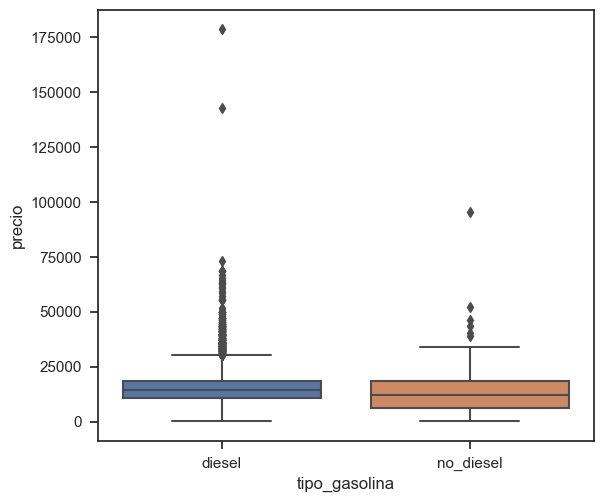

In [104]:
sns.boxplot(x='tipo_gasolina',y='precio', data=df_pricing_05_cat); # elprecio casi no varia. Podriamos eliminar la variable

In [105]:
#color
df_pricing_05_cat['color'].value_counts()

black     1634
grey      1166
blue       700
white      533
brown      341
silver     324
red         50
beige       41
green       18
orange       6
Name: color, dtype: int64

In [106]:
df_pricing_05_cat['color'] = np.where(df_pricing_05_cat['color'] == 'red','otro_color', df_pricing_05_cat['color'])

In [107]:
df_pricing_05_cat['color'] = np.where(df_pricing_05_cat['color'] == 'green','otro_color', df_pricing_05_cat['color'])

In [108]:
df_pricing_05_cat['color'] = np.where(df_pricing_05_cat['color'] == 'beige','otro_color', df_pricing_05_cat['color'])

In [109]:
df_pricing_05_cat['color'] = np.where(df_pricing_05_cat['color'] == 'orange','otro_color', df_pricing_05_cat['color'])

In [110]:
df_pricing_05_cat['color'].value_counts()

black         1634
grey          1166
blue           700
white          533
brown          341
silver         324
otro_color     115
Name: color, dtype: int64

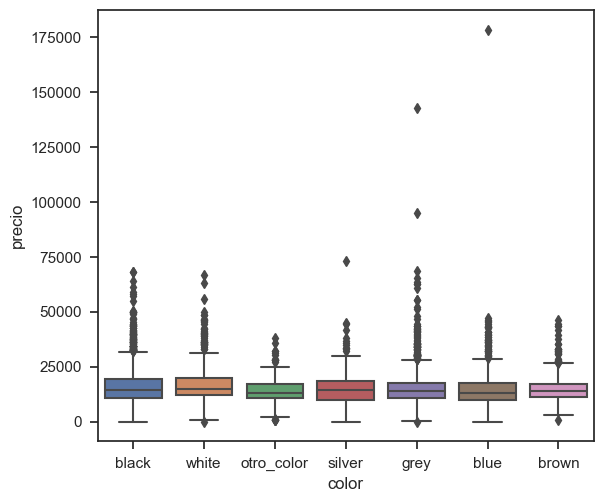

In [111]:
sns.boxplot(x='color',y='precio', data=df_pricing_05_cat);

In [112]:
#color
df_pricing_05_cat['tipo_coche'].value_counts()

estate         1604
sedan          1161
suv            1055
hatchback       696
subcompact      112
coupe            97
convertible      45
van              43
Name: tipo_coche, dtype: int64

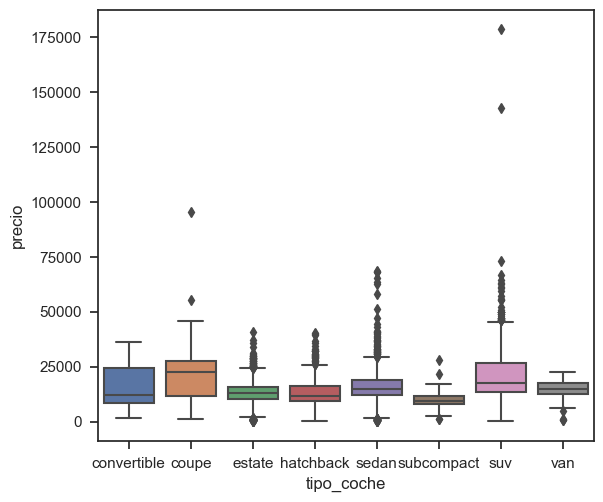

In [113]:
sns.boxplot(x='tipo_coche',y='precio', data=df_pricing_05_cat);

In [114]:
#copia
df_pricing_06=df_pricing_05_cat.copy()

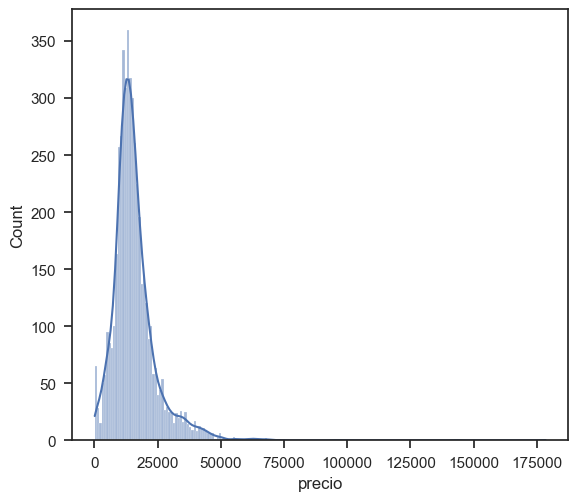

In [115]:
#TARGET
sns.histplot(data=df_pricing_06, x="precio",kde=True);


In [116]:

#dadoq ue hay outliers vamos a acotar con el z - score 
import scipy.stats as stats

In [117]:
# outliyers / atípicos
P_outliers = []

def detect_outliers_zscore(data):
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (z_score > 3):
            P_outliers.append(i)

In [118]:
muestra_outliers = detect_outliers_zscore(df_pricing_06['precio'])

In [119]:
print("Tenemos el número atípicos de: ",len(P_outliers))

Tenemos el número atípicos de:  73


In [120]:
z=np.abs(stats.zscore(df_pricing_06['precio']))


In [121]:
df_pricing_06['precio'].describe()

count      4813.000000
mean      15771.597756
std        9034.958054
min         100.000000
25%       10900.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

In [122]:
df_pricing_05_cat.shape[0]

4813

In [123]:
df_pricing_06_clean=df_pricing_06[z<3]

In [124]:
df_pricing_06_clean.shape[0]

4740

In [125]:
print("número de observaciones previas: ",df_pricing_05_cat.shape[0])

print("número de líneas posteriormente: ",df_pricing_06_clean.shape[0]);

número de observaciones previas:  4813
número de líneas posteriormente:  4740


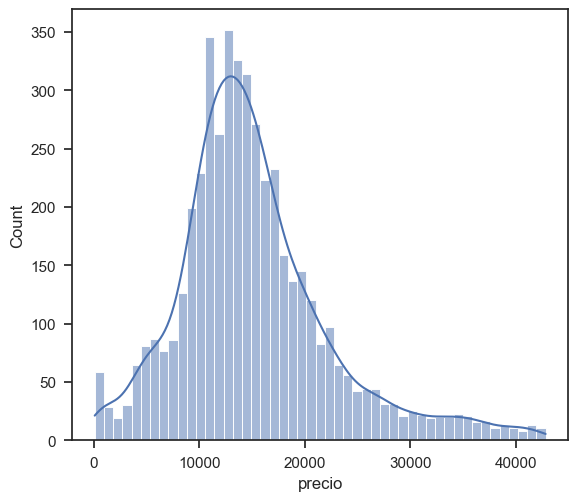

In [126]:
sns.histplot(data=df_pricing_06_clean, x="precio",kde=True);


In [127]:
#copia
df_pricing_07=df_pricing_06_clean.copy()

In [128]:
#eliminamos el 2.5% mas bajo respecto al precio
df_pricing_07 = df_pricing_06_clean[df_pricing_06_clean['precio'] < df_pricing_06_clean['precio'].quantile(.975)]

In [129]:
df_pricing_07.shape[0]

4620

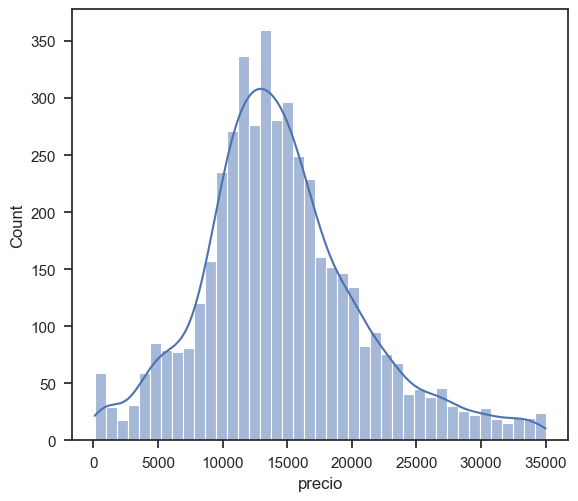

In [130]:
sns.histplot(data=df_pricing_07, x="precio",kde=True);


dejamos asentado el código de log para otros casos

In [131]:
#aplicamos el log para tratar de que la distribución sean lo mas simétrica posible
#df_pricing_07["log10_precio"]=np.log10(df_pricing_07["precio"])


In [132]:
#sns.histplot(data=df_pricing_07, x="log10_precio",kde=True)


##### Preprocesamiento. 
###### Correlacción: Detectaremos si hay variables que expliquen lo mismo

In [133]:
corr7 = df_pricing_07.corr()
corr7.style.background_gradient(cmap='coolwarm')

/var/folders/cb/qsc54clj5ln45bl99qwqssfh0000gn/T/ipykernel_45789/2514889460.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr7 = df_pricing_07.corr()


,km,potencia,gps,precio,fecha_registro_MES,fecha_registro_ANIO,fecha_venta_MES,modelo_0,modelo_1,modelo_2,modelo_3,modelo_4,modelo_5,modelo_6
km,1.000000,0.059700,0.169685,-0.393325,-0.020873,-0.487868,0.002942,-0.080673,-0.146548,0.088964,0.087268,0.068240,-0.011934,-0.011331
potencia,0.059700,1.000000,-0.002896,0.576930,0.008828,0.015216,-0.058332,-0.031928,-0.023176,0.335098,0.189981,0.213050,0.059860,0.117285
gps,0.169685,-0.002896,1.000000,0.007736,-0.016750,-0.078783,0.069497,-0.001873,-0.063551,0.034010,0.041381,-0.002668,0.037258,0.002922
precio,-0.393325,0.576930,0.007736,1.000000,0.001082,0.509059,-0.024947,0.027998,0.172352,0.237110,0.145872,0.185591,-0.049472,0.164473
fecha_registro_MES,-0.020873,0.008828,-0.016750,0.001082,1.000000,-0.068147,-0.014144,0.005729,0.010029,-0.002770,-0.051878,-0.058121,0.025068,0.005081
fecha_registro_ANIO,-0.487868,0.015216,-0.078783,0.509059,-0.068147,1.000000,-0.060474,0.078676,0.081123,-0.056743,-0.025341,-0.037057,-0.000064,-0.036921
fecha_venta_MES,0.002942,-0.058332,0.069497,-0.024947,-0.014144,-0.060474,1.000000,0.035954,0.102442,-0.008429,0.020967,0.030587,-0.026138,0.046003
modelo_0,-0.080673,-0.031928,-0.001873,0.027998,0.005729,0.078676,0.035954,1.000000,-0.071463,-0.076948,-0.082345,-0.062992,0.056976,-0.009301
modelo_1,-0.146548,-0.023176,-0.063551,0.172352,0.010029,0.081123,0.102442,-0.071463,1.000000,-0.126822,-0.167271,-0.030754,-0.022827,0.107620
modelo_2,0.088964,0.335098,0.034010,0.237110,-0.002770,-0.056743,-0.008429,-0.076948,-0.126822,1.000000,0.518647,0.356786,-0.155179,-0.251283


In [134]:
#ALGUNOS GRUPOS DE MODELOS TIENEN CORRELACION ALTA

##### Target vs variables Independientes

In [135]:
# uso de violín para las categóricas

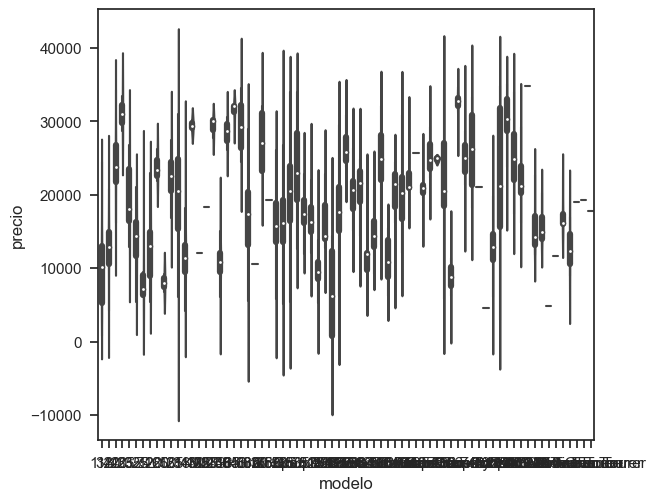

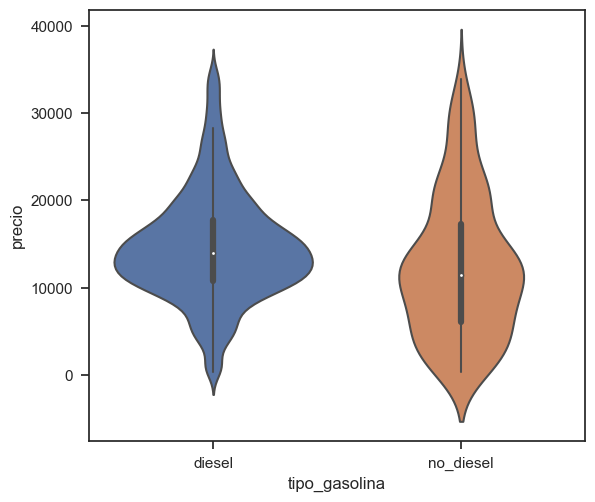

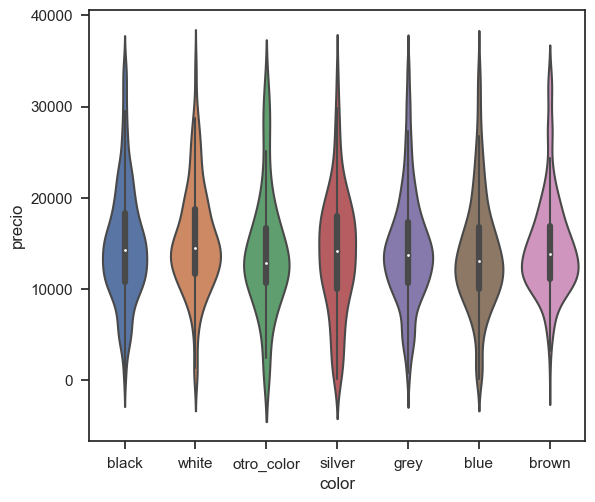

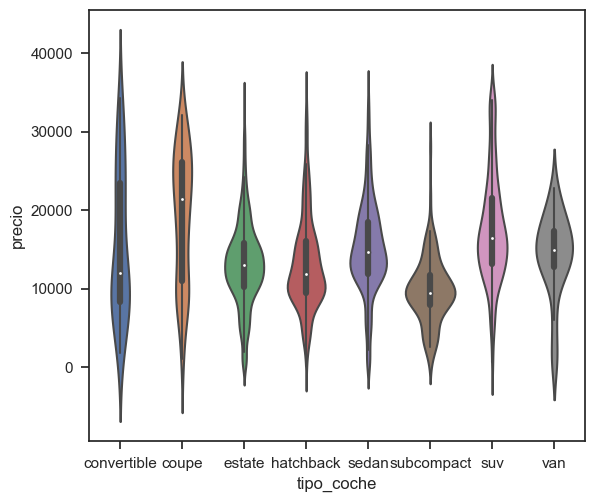

In [136]:
for i in lista_categorica:
    plt.figure()
    sns.violinplot(x=i, y="precio",data=df_pricing_07,col='categorical');

In [137]:
#INTETNAR DE QUE HAYA 3 GRÁFICOS POR FILA, ASI ES MAS FACIL DE VISUALIZAR. NO ME SALIO
#fig, axes = plt.subplots(1,3)
#fig.suptitle('Rel var num vs P')
#sns.scatterplot(ax=axes[0,0],x='precio', y="potencia", data=df_pricing_07)  
#sns.scatterplot(ax=axes[0,1],x='precio', y="km", data=df_pricing_07) 
#sns.scatterplot(ax=axes[0,2],x='precio', y="fecha_registro_ANIO", data=df_pricing_07) 

In [138]:
#vuelvo a correr la fx porque hay variables que eliminamos y genera error cuando hacemos los gráficos
lista_num,lista_boolean,lista_categorica = obtener_lista_variables(df_pricing_07)

In [139]:
df_pricing_07.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4842
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4620 non-null   object 
 1   km                           4620 non-null   float64
 2   potencia                     4620 non-null   float64
 3   tipo_gasolina                4620 non-null   object 
 4   color                        4620 non-null   object 
 5   tipo_coche                   4620 non-null   object 
 6   volante_regulable            4620 non-null   object 
 7   aire_acondicionado           4620 non-null   object 
 8   camara_trasera               4620 non-null   object 
 9   asientos_traseros_plegables  4620 non-null   object 
 10  elevalunas_electrico         4620 non-null   object 
 11  bluetooth                    4620 non-null   object 
 12  gps                          4620 non-null   bool   
 13  alerta_lim_velocid

In [140]:
df_pricing_07['tipo_gasolina'].value_counts()

diesel       4436
no_diesel     184
Name: tipo_gasolina, dtype: int64

In [141]:
# como ahora tenemos 2 categorias de tipo_gasolina, pasa a ser un boolean pq tiene 2 valores, entonces cambiamos
#el nombre de la variable a :Diesel

In [142]:
df_pricing_07 = df_pricing_07.rename(columns={'tipo_gasolina':'diesel'})

In [143]:
lista_num,lista_boolean,lista_categorica = obtener_lista_variables(df_pricing_07)

In [144]:
df_pricing_07['modelo_6'].dtype.kind

'i'

In [145]:
lista_num

['km',
 'potencia',
 'fecha_registro_MES',
 'fecha_registro_ANIO',
 'fecha_venta_MES']

<Figure size 640x560 with 0 Axes>

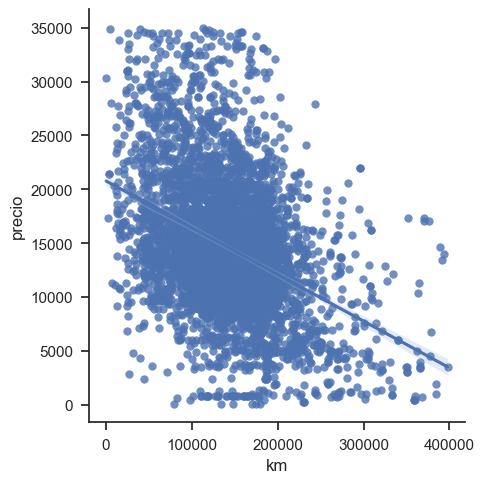

<Figure size 640x560 with 0 Axes>

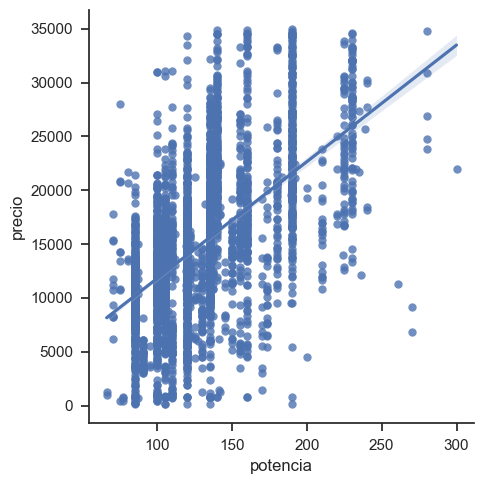

<Figure size 640x560 with 0 Axes>

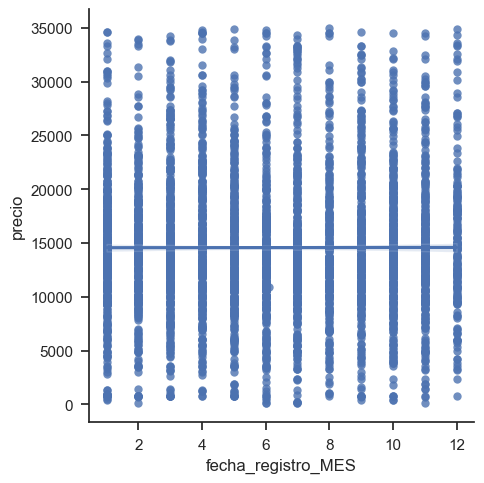

<Figure size 640x560 with 0 Axes>

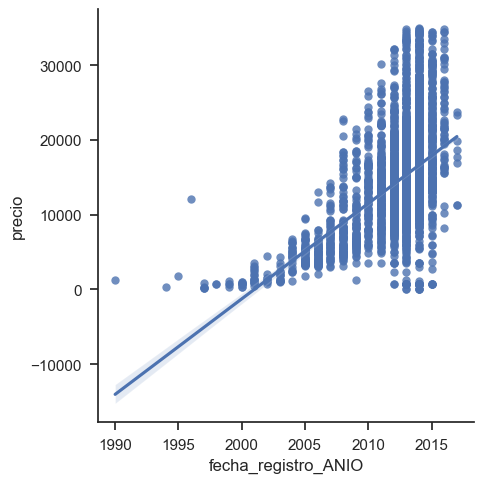

<Figure size 640x560 with 0 Axes>

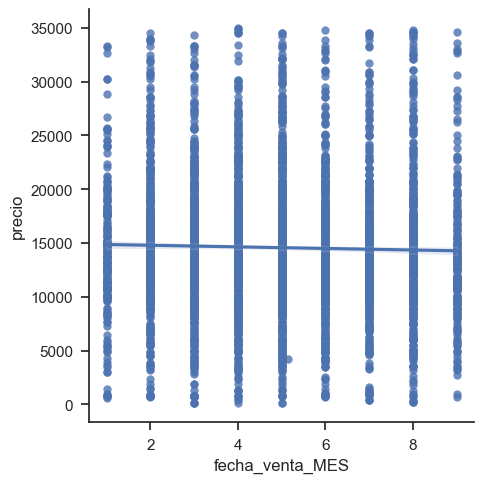

In [146]:
# uso de scatter para numéricas

from seaborn import lmplot
for i in lista_num:
    
    plt.figure()
    lmplot(x=i, y="precio", data=df_pricing_07)



In [147]:
df_pricing_08=df_pricing_07.copy()

In [148]:
#en funcion de los gráficos, vemos que las variables de meses no mueven el precio, la pendiente de la tendencia es casi 0. Entonces las borramos.
df_pricing_08.drop('fecha_venta_MES',axis=1,inplace=True)

In [149]:
df_pricing_08.drop('fecha_registro_MES',axis=1,inplace=True)

In [150]:
df_pricing_08.head()

,modelo,km,potencia,diesel,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,alerta_lim_velocidad,precio,fecha_registro_ANIO,modelo_0,modelo_1,modelo_2,modelo_3,modelo_4,modelo_5,modelo_6
0,118,140411.0,100.0,diesel,black,convertible,True,True,False,False,...,False,11300.0,2012,0,0,0,0,0,0,1
2,320,183297.0,120.0,diesel,white,convertible,False,False,False,False,...,False,10200.0,2012,0,0,0,0,0,1,0
3,420,128035.0,135.0,diesel,otro_color,convertible,True,True,False,False,...,True,25100.0,2014,0,0,0,0,0,1,1
4,425,97097.0,160.0,diesel,silver,convertible,True,True,False,False,...,True,33400.0,2014,0,0,0,0,1,0,0
5,335,152352.0,225.0,no_diesel,black,convertible,True,True,False,False,...,True,17100.0,2011,0,0,0,0,1,0,1


##### Reescalado de variables

''
Nuestro objetivo es predecir el precio del coche, vamos a utilizar las siguientes estrategias; 
Label Encoding, 
One Hot Encoding, 
Min max scaling
''

In [151]:
lista_boolean

['diesel',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [152]:
df_pricing_08['diesel']=np.where(df_pricing_08['diesel']=='diesel','True','False')


In [153]:
df_pricing_08['diesel'].value_counts()

True     4436
False     184
Name: diesel, dtype: int64

In [154]:
df_pricing_08.head()

,modelo,km,potencia,diesel,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,alerta_lim_velocidad,precio,fecha_registro_ANIO,modelo_0,modelo_1,modelo_2,modelo_3,modelo_4,modelo_5,modelo_6
0,118,140411.0,100.0,True,black,convertible,True,True,False,False,...,False,11300.0,2012,0,0,0,0,0,0,1
2,320,183297.0,120.0,True,white,convertible,False,False,False,False,...,False,10200.0,2012,0,0,0,0,0,1,0
3,420,128035.0,135.0,True,otro_color,convertible,True,True,False,False,...,True,25100.0,2014,0,0,0,0,0,1,1
4,425,97097.0,160.0,True,silver,convertible,True,True,False,False,...,True,33400.0,2014,0,0,0,0,1,0,0
5,335,152352.0,225.0,False,black,convertible,True,True,False,False,...,True,17100.0,2011,0,0,0,0,1,0,1


In [155]:
#paso Diesel a booleana para poder pasarla a int
df_pricing_08['diesel']=df_pricing_08['diesel'].astype(bool)

In [156]:
#me la pasa mal a dummie, igual el 96% de las observaciones es diesel. La borramos. Ver por qué me da mal 

In [157]:
df_pricing_08.drop('diesel',axis=1,inplace=True)

In [158]:
#actualizamos listas
lista_num,lista_boolean,lista_categorica = obtener_lista_variables(df_pricing_08)

In [159]:
#vamos a transformar las Variables que tiene True/False
for i in lista_boolean:
    df_pricing_08[i] = df_pricing_08[i].astype(int)

In [160]:
df_pricing_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4842
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4620 non-null   object 
 1   km                           4620 non-null   float64
 2   potencia                     4620 non-null   float64
 3   color                        4620 non-null   object 
 4   tipo_coche                   4620 non-null   object 
 5   volante_regulable            4620 non-null   int64  
 6   aire_acondicionado           4620 non-null   int64  
 7   camara_trasera               4620 non-null   int64  
 8   asientos_traseros_plegables  4620 non-null   int64  
 9   elevalunas_electrico         4620 non-null   int64  
 10  bluetooth                    4620 non-null   int64  
 11  gps                          4620 non-null   int64  
 12  alerta_lim_velocidad         4620 non-null   int64  
 13  precio            

In [161]:
#copia asi eliminamos la variable 'modelo'
df_pricing_09=df_pricing_08.copy()

In [162]:
df_pricing_09.drop('modelo',axis=1,inplace=True)

In [163]:
lista_modelos=['modelo_0','modelo_1','modelo_2','modelo_3','modelo_4','modelo_5','modelo_6']

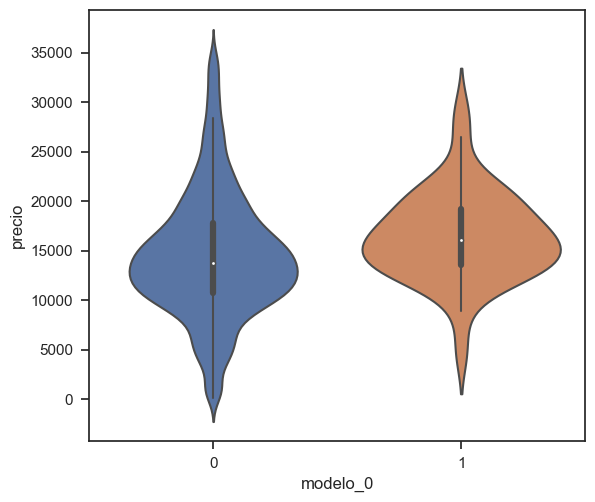

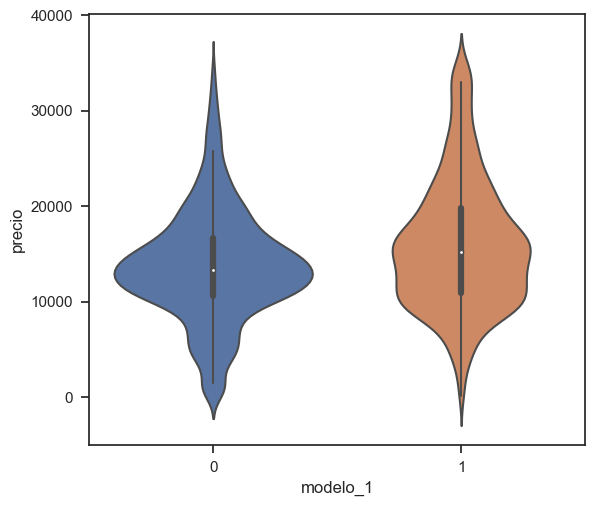

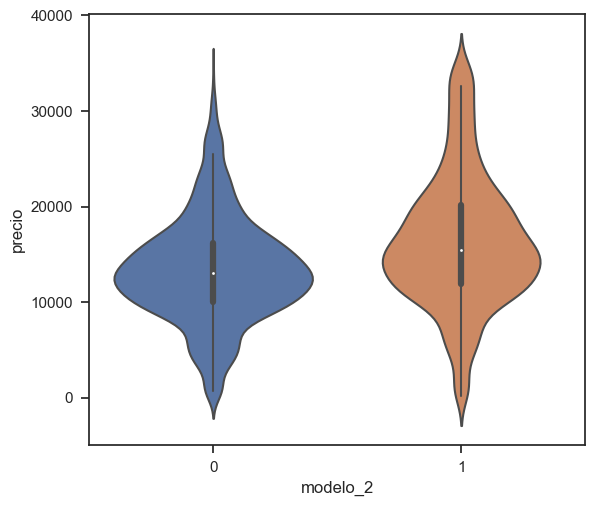

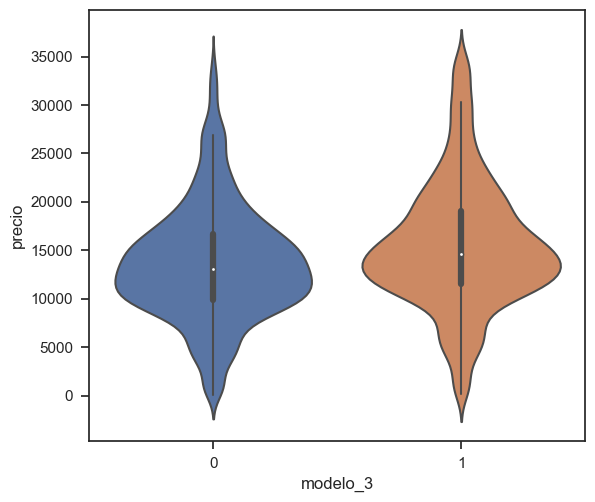

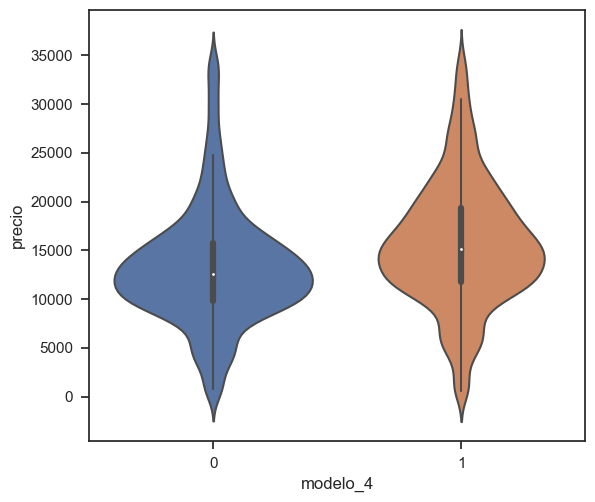

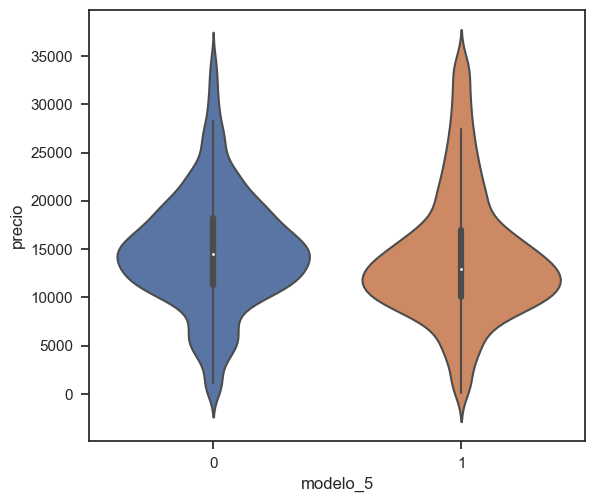

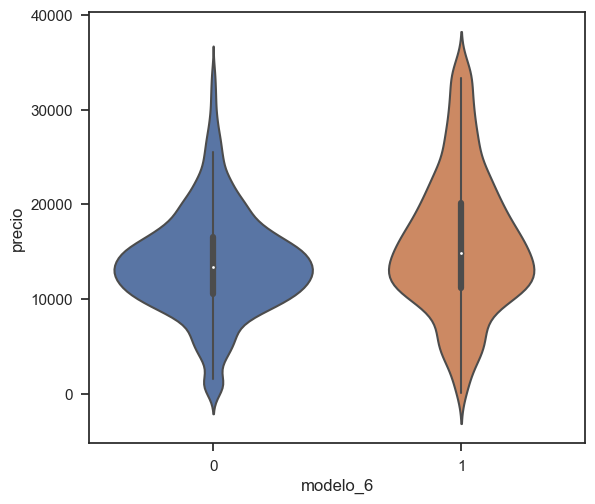

In [164]:
for i in lista_modelos:
    plt.figure()
    sns.violinplot(x=i, y="precio",data=df_pricing_09,col='categorical')


In [165]:
lista_categorica

['modelo', 'color', 'tipo_coche']

In [166]:
#pasamos las variables categoricas a dummies

df_pricing_10 = pd.get_dummies(data=df_pricing_09, columns=['color','tipo_coche']) 

In [167]:
df_pricing_10.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4842
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4620 non-null   float64
 1   potencia                     4620 non-null   float64
 2   volante_regulable            4620 non-null   int64  
 3   aire_acondicionado           4620 non-null   int64  
 4   camara_trasera               4620 non-null   int64  
 5   asientos_traseros_plegables  4620 non-null   int64  
 6   elevalunas_electrico         4620 non-null   int64  
 7   bluetooth                    4620 non-null   int64  
 8   gps                          4620 non-null   int64  
 9   alerta_lim_velocidad         4620 non-null   int64  
 10  precio                       4620 non-null   float64
 11  fecha_registro_ANIO          4620 non-null   int32  
 12  modelo_0                     4620 non-null   int64  
 13  modelo_1          

In [168]:
df_pricing_10.head()


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,183297.0,120.0,0,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3,128035.0,135.0,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,97097.0,160.0,1,1,0,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
5,152352.0,225.0,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [169]:
#normalizacion de variables numéricas
minMaxResultado = MinMaxScaler()



In [170]:
lista_num

['km', 'potencia', 'fecha_registro_ANIO']

In [171]:

def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_pricing_10[variable_transformar]=minMaxResultado.fit_transform(df_pricing_10[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [172]:
minMax_km=minmaxTransformacion("km")

In [173]:
minMax_potencia=minmaxTransformacion("potencia")

In [174]:
minMax_potencia=minmaxTransformacion("fecha_registro_ANIO")

In [175]:
df_pricing_10.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.351978,0.145299,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0.459850,0.230769,0,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3,0.320849,0.294872,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0.243031,0.401709,1,1,0,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
5,0.382014,0.679487,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [176]:
corr = df_pricing_10.corr()


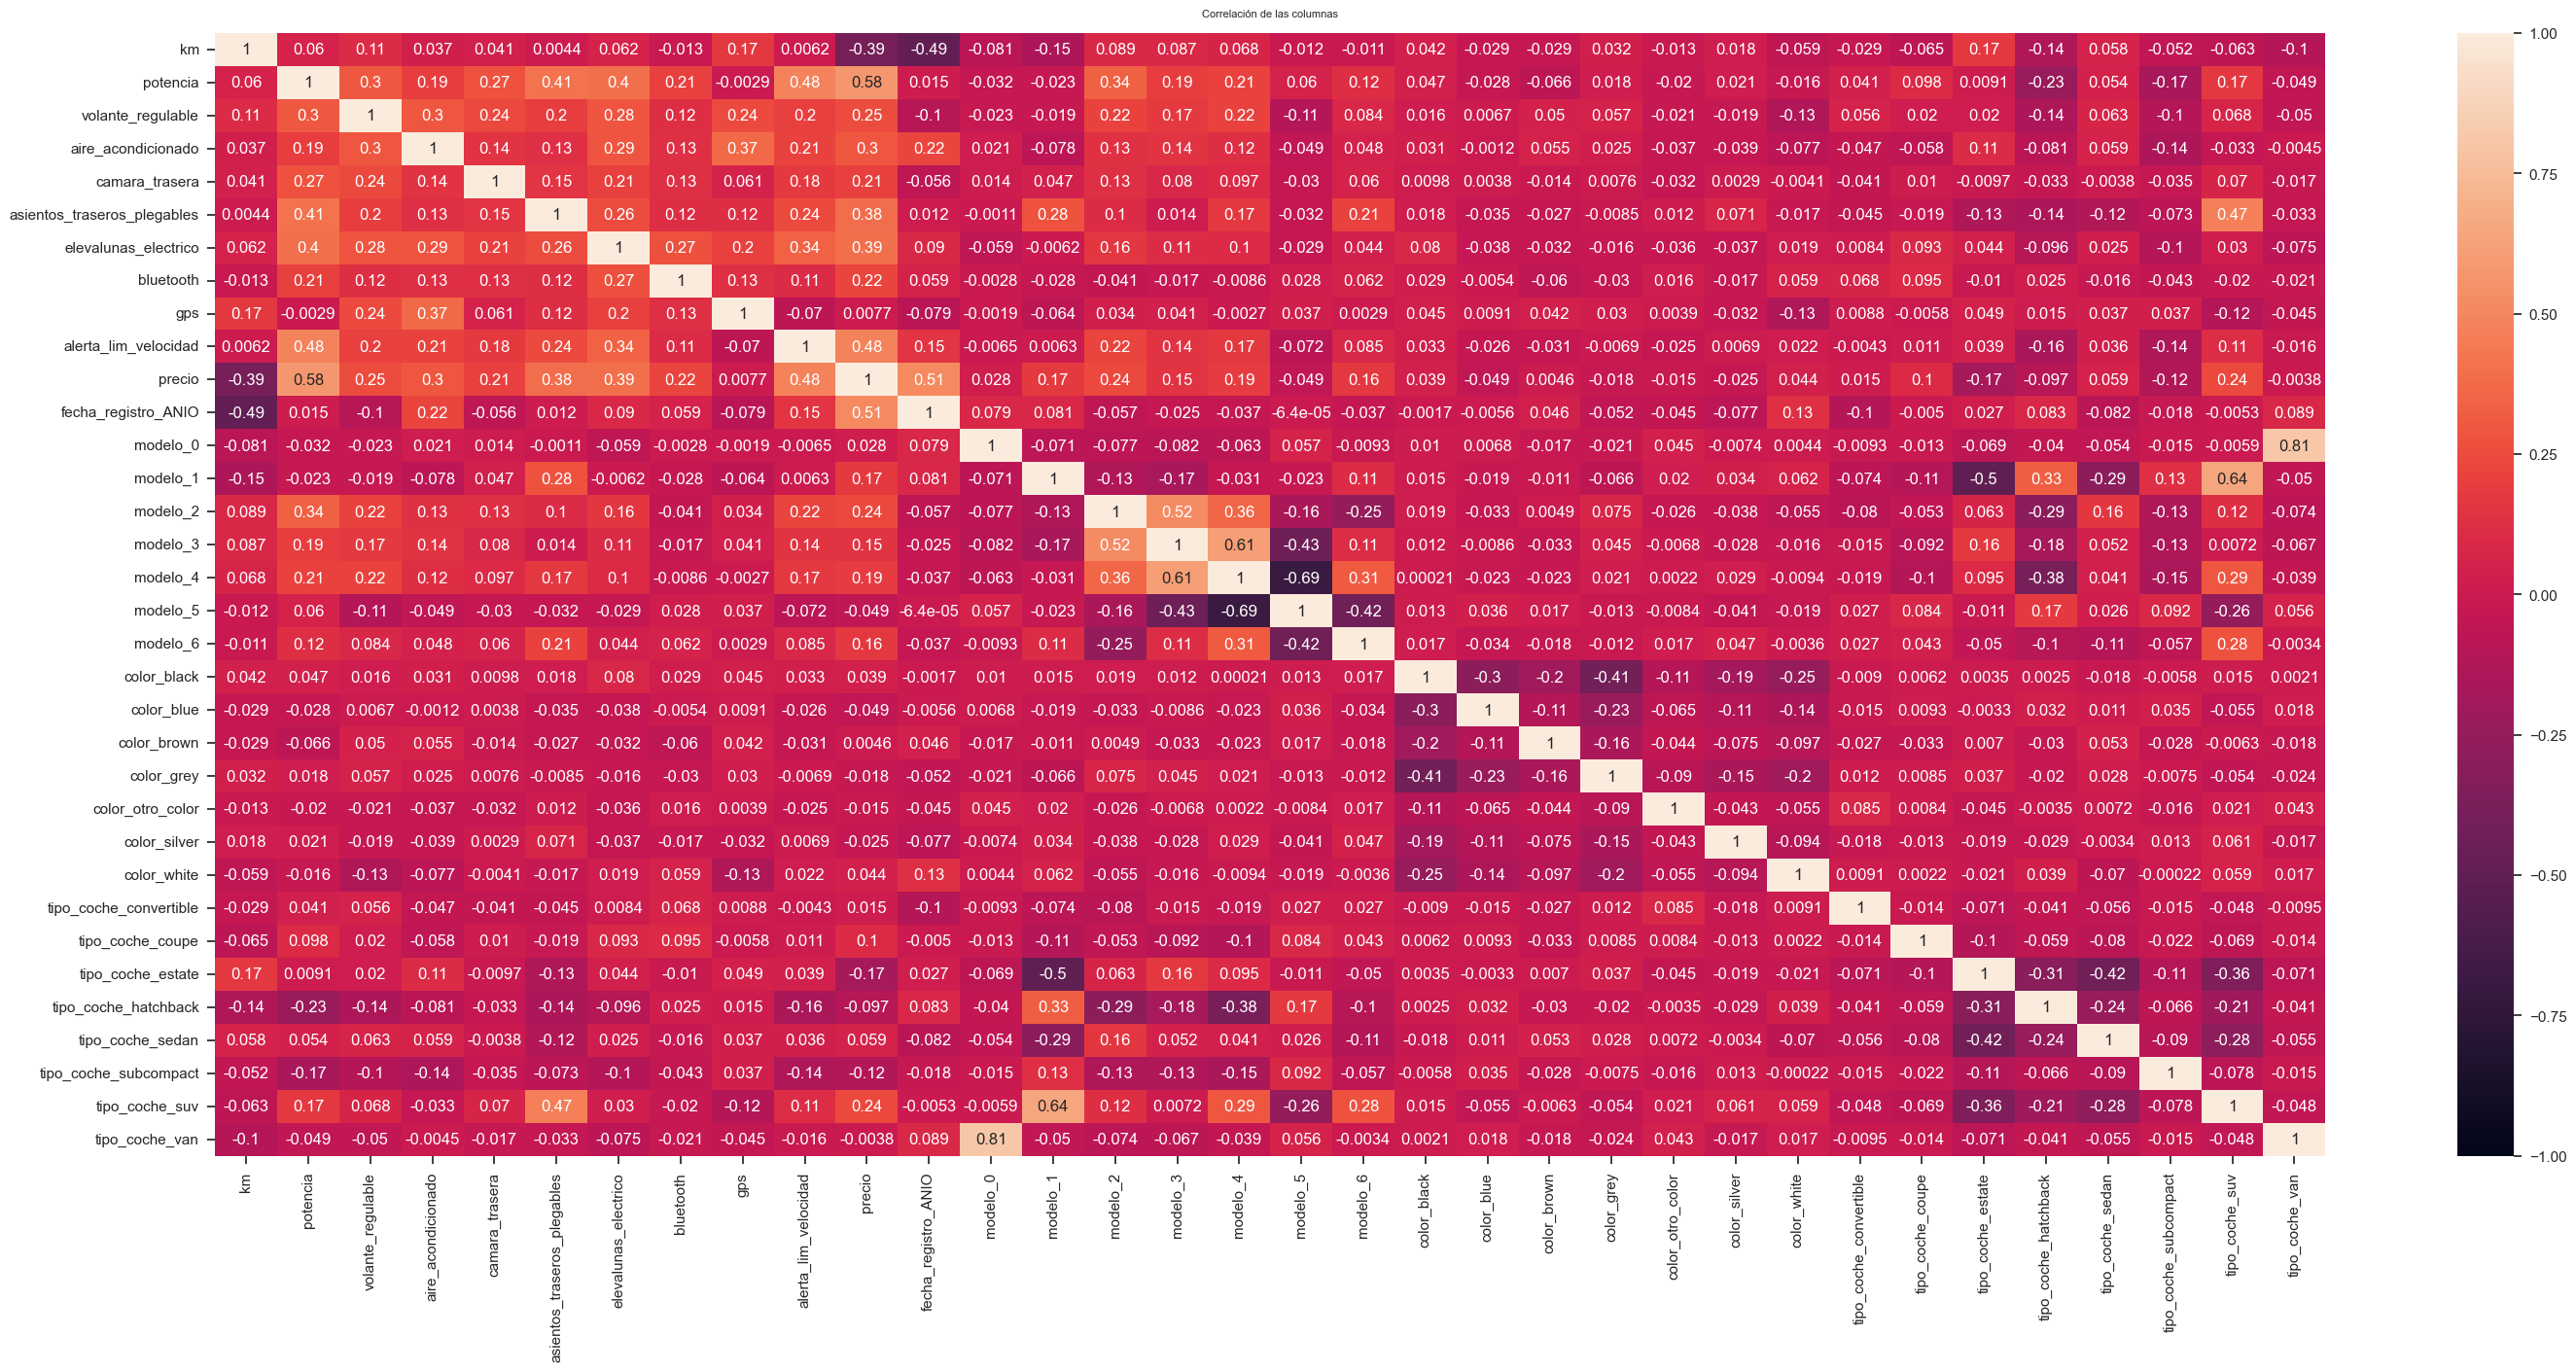

In [177]:
plt.figure(figsize=(35, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlación de las columnas', fontdict={'fontsize':8}, pad=12);

In [178]:
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr2.stack()


km                     potencia                       0.059700
                       volante_regulable              0.109353
                       aire_acondicionado             0.037492
                       camara_trasera                 0.041122
                       asientos_traseros_plegables    0.004439
                                                        ...   
tipo_coche_sedan       tipo_coche_suv                -0.281641
                       tipo_coche_van                -0.055347
tipo_coche_subcompact  tipo_coche_suv                -0.077743
                       tipo_coche_van                -0.015278
tipo_coche_suv         tipo_coche_van                -0.047807
Length: 561, dtype: float64

In [179]:
corr3 = corr2.unstack().dropna()
corr4 = corr3.sort_values()


In [180]:
corr4

modelo_5             modelo_4   -0.694943
tipo_coche_estate    modelo_1   -0.504571
fecha_registro_ANIO  km         -0.487868
modelo_5             modelo_3   -0.431151
modelo_6             modelo_5   -0.422426
                                   ...   
modelo_3             modelo_2    0.518647
precio               potencia    0.576930
modelo_4             modelo_3    0.607601
tipo_coche_suv       modelo_1    0.642878
tipo_coche_van       modelo_0    0.808011
Length: 561, dtype: float64

In [181]:
corr4.tail(10)

asientos_traseros_plegables  potencia                       0.408875
tipo_coche_suv               asientos_traseros_plegables    0.465627
alerta_lim_velocidad         potencia                       0.483820
precio                       alerta_lim_velocidad           0.483975
fecha_registro_ANIO          precio                         0.509059
modelo_3                     modelo_2                       0.518647
precio                       potencia                       0.576930
modelo_4                     modelo_3                       0.607601
tipo_coche_suv               modelo_1                       0.642878
tipo_coche_van               modelo_0                       0.808011
dtype: float64

In [182]:
df_pricing_prueba = df_pricing_10.drop([col for col in df_pricing_10.columns if 'modelo' in col],axis=1)

In [183]:
df_pricing_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4842
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4620 non-null   float64
 1   potencia                     4620 non-null   float64
 2   volante_regulable            4620 non-null   int64  
 3   aire_acondicionado           4620 non-null   int64  
 4   camara_trasera               4620 non-null   int64  
 5   asientos_traseros_plegables  4620 non-null   int64  
 6   elevalunas_electrico         4620 non-null   int64  
 7   bluetooth                    4620 non-null   int64  
 8   gps                          4620 non-null   int64  
 9   alerta_lim_velocidad         4620 non-null   int64  
 10  precio                       4620 non-null   float64
 11  fecha_registro_ANIO          4620 non-null   float64
 12  color_black                  4620 non-null   uint8  
 13  color_blue        

In [184]:
corr = df_pricing_prueba.corr()

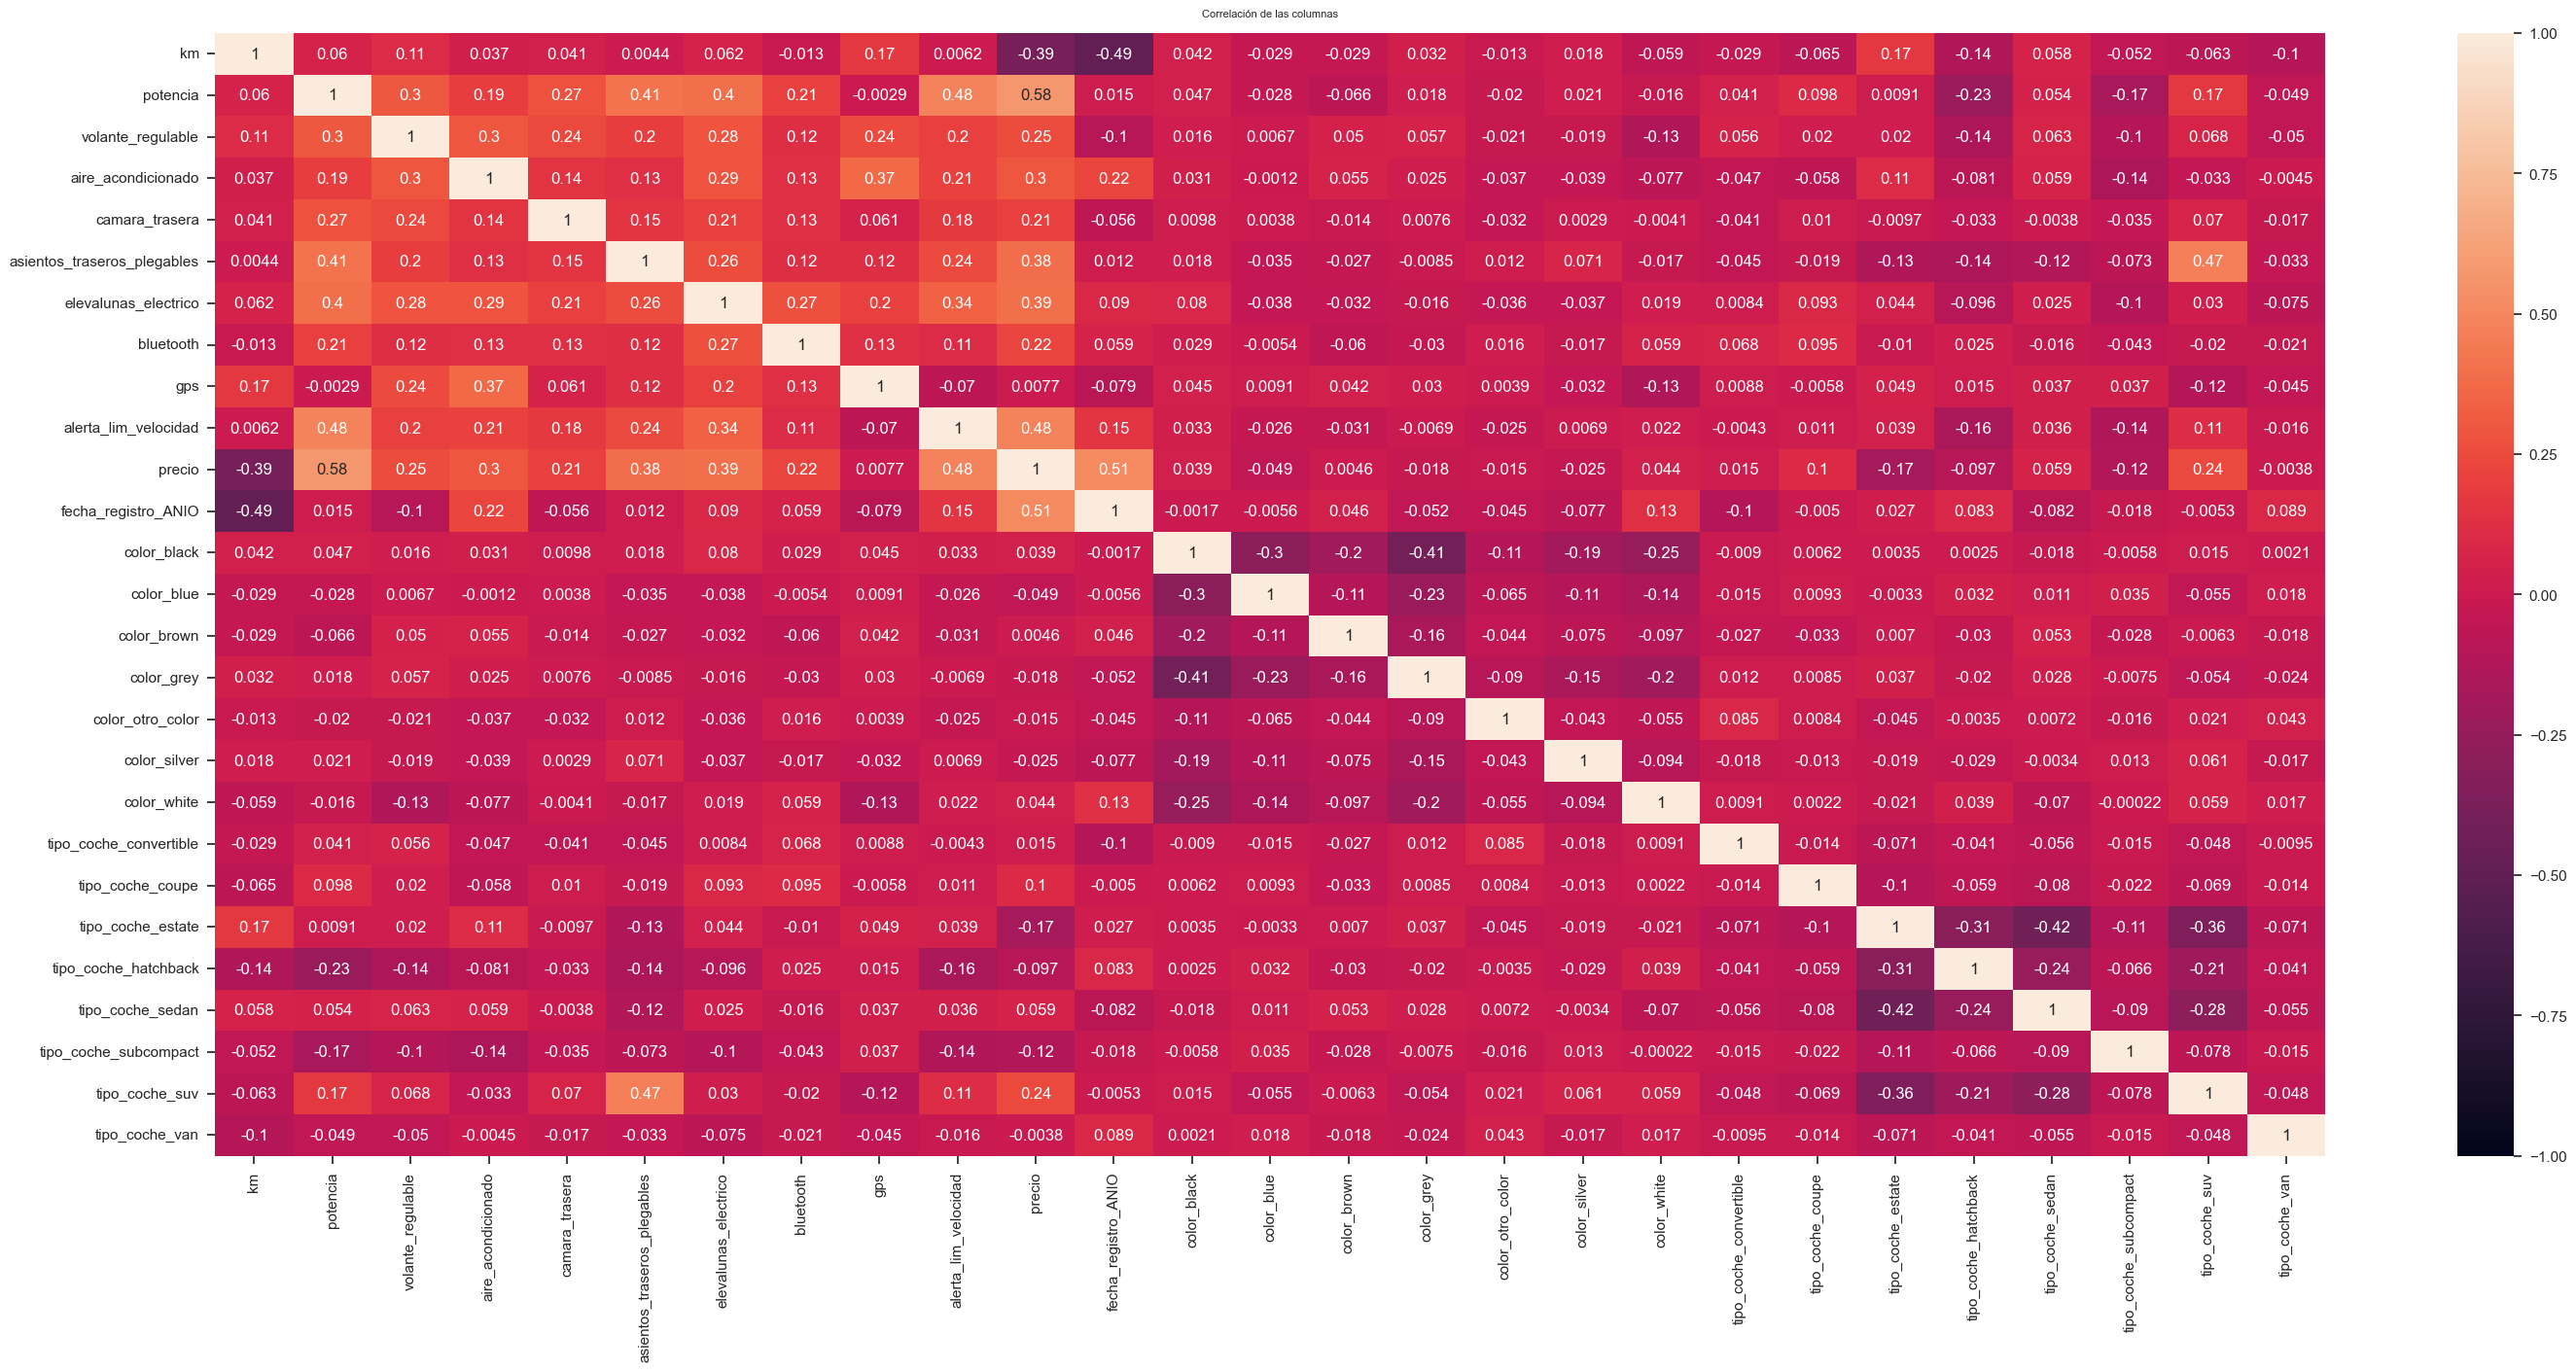

In [185]:
plt.figure(figsize=(35, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlación de las columnas', fontdict={'fontsize':8}, pad=12);

In [186]:
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr2.stack()

km                     potencia                       0.059700
                       volante_regulable              0.109353
                       aire_acondicionado             0.037492
                       camara_trasera                 0.041122
                       asientos_traseros_plegables    0.004439
                                                        ...   
tipo_coche_sedan       tipo_coche_suv                -0.281641
                       tipo_coche_van                -0.055347
tipo_coche_subcompact  tipo_coche_suv                -0.077743
                       tipo_coche_van                -0.015278
tipo_coche_suv         tipo_coche_van                -0.047807
Length: 351, dtype: float64

In [187]:
corr3 = corr2.unstack().dropna()
corr4 = corr3.sort_values()

In [188]:
corr4

fecha_registro_ANIO   km                            -0.487868
tipo_coche_sedan      tipo_coche_estate             -0.415828
color_grey            color_black                   -0.406312
precio                km                            -0.393325
tipo_coche_suv        tipo_coche_estate             -0.359179
                                                       ...   
                      asientos_traseros_plegables    0.465627
alerta_lim_velocidad  potencia                       0.483820
precio                alerta_lim_velocidad           0.483975
fecha_registro_ANIO   precio                         0.509059
precio                potencia                       0.576930
Length: 351, dtype: float64

In [189]:
corr5 = df_pricing_prueba.corr()
corr[['precio']].sort_values(by = 'precio',ascending = False)\
.style.background_gradient()

,precio
precio,1.000000
potencia,0.576930
fecha_registro_ANIO,0.509059
alerta_lim_velocidad,0.483975
elevalunas_electrico,0.391332
asientos_traseros_plegables,0.383051
aire_acondicionado,0.296376
volante_regulable,0.252173
tipo_coche_suv,0.239949
bluetooth,0.221278
